***
# <h1 align = 'center'>Graph analytics</h1> 
#### <center> Abderahmane BELLAMINE, Manal EL IDRISSI </center>
#### <center> Ecole Centrale Casablanca </center>
#### <center> January 2021 </center>
***

The purpose of this jupyter notebooks file is to perform some graph analytics on the data collected from Twitter usng Python and Twitter API. 

### Objectives of this file:
- Graph analytics

#### Dependencies import

In [1]:
# import the functions from the tweepy library that you will need for authentification
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

## Load Data

In [2]:
df_usa = pd.read_csv("../cleaned_data/usa_for_bokeh.csv")

# Working with (social) graphs: Networkx

In [3]:
nx.__version__


'2.6.3'

## Creating a simple graph

In [4]:
df = df_usa.head(30)

In [5]:
#create an empty graph
g = nx.Graph()

In [6]:
g

In [7]:
# Create an undirected weighted graph using your Dataframe
g = nx.from_pandas_edgelist(df, source='twitter_name', target='sentiment', create_using=nx.Graph())

In [8]:
g.edges()

EdgeView([('SnowAndBeach', 'neutral'), ('neutral', 'socialstartnow1'), ('neutral', 'Katrina5Mm'), ('neutral', 'EdwardLawrence'), ('neutral', 'michaelfbloom'), ('neutral', 'AnyPollApp'), ('neutral', 'DFeazelle'), ('neutral', 'drswlong'), ('neutral', 'Gate_15_Analyst'), ('neutral', 'Astrologic007'), ('neutral', 'SameenaKluck'), ('MichaelTurk', 'positive'), ('positive', 'Gate_15_Analyst'), ('positive', 'StottlemyreS'), ('positive', 'EricFerreri'), ('positive', 'gcgeraci'), ('positive', 'Parkesdm'), ('Gate_15_Analyst', 'negative'), ('negative', 'VippusaO'), ('negative', 'HouseBuyerQuest'), ('negative', 'vision_times'), ('negative', 'JakeBI6'), ('negative', 'carsueb'), ('negative', 'AnikoTevvit')])

In [9]:
g.nodes()

NodeView(('SnowAndBeach', 'neutral', 'MichaelTurk', 'positive', 'Gate_15_Analyst', 'negative', 'VippusaO', 'socialstartnow1', 'StottlemyreS', 'Katrina5Mm', 'EricFerreri', 'EdwardLawrence', 'michaelfbloom', 'HouseBuyerQuest', 'vision_times', 'JakeBI6', 'AnyPollApp', 'DFeazelle', 'carsueb', 'drswlong', 'gcgeraci', 'Parkesdm', 'AnikoTevvit', 'Astrologic007', 'SameenaKluck'))

In [10]:
list(g.neighbors('SnowAndBeach'))

['neutral']

## Plotting a graph

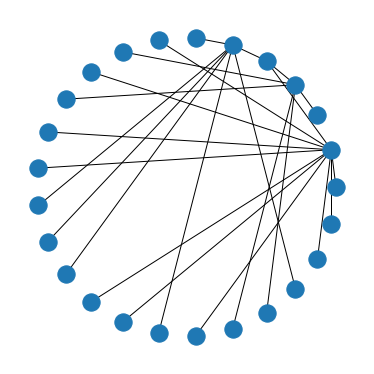

In [11]:
plt.figure(figsize = (5, 5))
nx.draw_circular(g, with_labels = False)
plt.show()

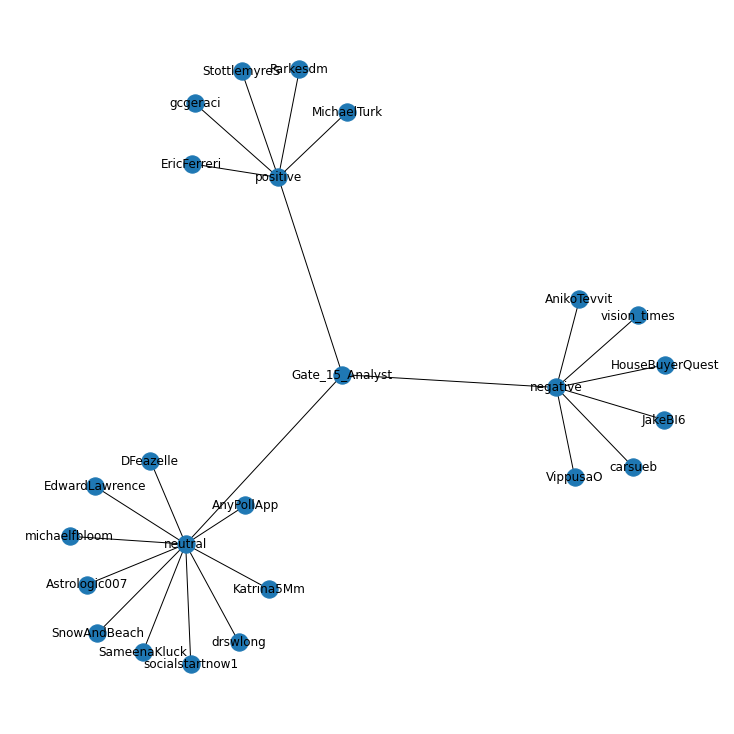

In [12]:
plt.figure(figsize = (10, 10))
nx.draw_spring(g, with_labels = True)
plt.show()

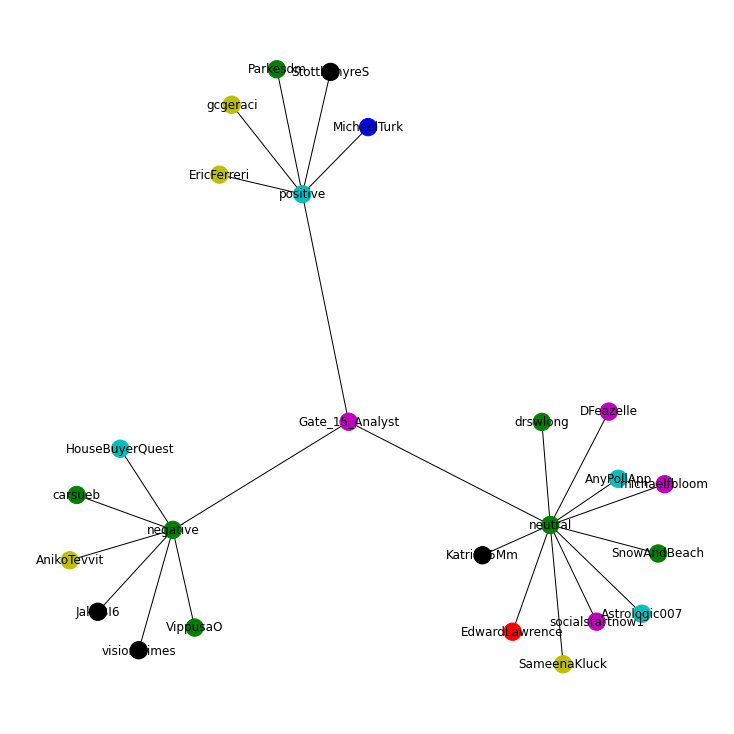

<Figure size 432x288 with 0 Axes>

In [13]:
import numpy as np
import random
colors = ['b', 'r','g', 'c', 'k', 'y', 'm']
plt.figure(figsize = (10, 10))
L = [random.choice(colors) for i in range(len(g.nodes()))]
nx.draw(g, with_labels = True, node_color = L)
plt.show()
plt.savefig('../images/usa_graph_fixed_node_size.png')

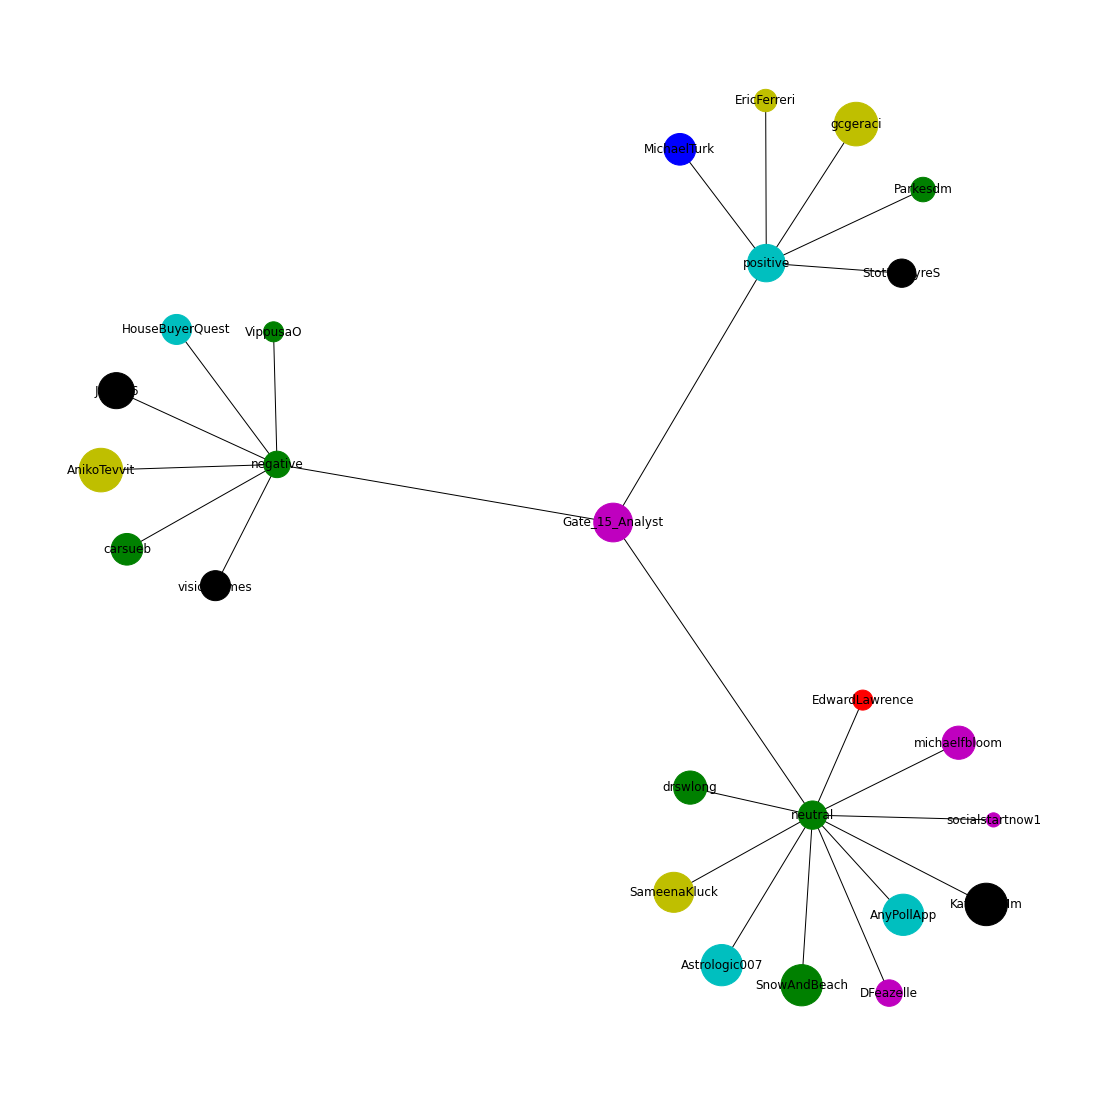

<Figure size 432x288 with 0 Axes>

In [14]:
colors = col_agents = ['b', 'r', 'r', 'r','g','r','b','b','g']
list_numbers = range(100,2000, 100)
sizes = [random.choice(list_numbers) for i in range(len(g.nodes()))]
plt.figure(figsize = (15, 15))
nx.draw(g, with_labels = True, node_color = L, node_size=sizes)
plt.show()
plt.savefig('../images/usa_graph_variable_node_size.png')

In [15]:
g.nodes().data()

NodeDataView({'SnowAndBeach': {}, 'neutral': {}, 'MichaelTurk': {}, 'positive': {}, 'Gate_15_Analyst': {}, 'negative': {}, 'VippusaO': {}, 'socialstartnow1': {}, 'StottlemyreS': {}, 'Katrina5Mm': {}, 'EricFerreri': {}, 'EdwardLawrence': {}, 'michaelfbloom': {}, 'HouseBuyerQuest': {}, 'vision_times': {}, 'JakeBI6': {}, 'AnyPollApp': {}, 'DFeazelle': {}, 'carsueb': {}, 'drswlong': {}, 'gcgeraci': {}, 'Parkesdm': {}, 'AnikoTevvit': {}, 'Astrologic007': {}, 'SameenaKluck': {}})

## ...with numpy:

In [16]:
a = nx.to_numpy_array(g, weight='weight')
a

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0.,
        1., 1., 0., 1., 0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 1., 0., 0., 0.],
       [0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
        0., 0., 1., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [17]:
g2 = nx.from_numpy_array(a)
g2.edges()

EdgeView([(0, 1), (1, 4), (1, 7), (1, 9), (1, 11), (1, 12), (1, 16), (1, 17), (1, 19), (1, 23), (1, 24), (2, 3), (3, 4), (3, 8), (3, 10), (3, 20), (3, 21), (4, 5), (5, 6), (5, 13), (5, 14), (5, 15), (5, 18), (5, 22)])

In [18]:
names = list(g.nodes())
d = {i:names[i] for i in range(len(names))}
print(d)
g2 = nx.relabel.relabel_nodes(g2, d)
g2.nodes()

{0: 'SnowAndBeach', 1: 'neutral', 2: 'MichaelTurk', 3: 'positive', 4: 'Gate_15_Analyst', 5: 'negative', 6: 'VippusaO', 7: 'socialstartnow1', 8: 'StottlemyreS', 9: 'Katrina5Mm', 10: 'EricFerreri', 11: 'EdwardLawrence', 12: 'michaelfbloom', 13: 'HouseBuyerQuest', 14: 'vision_times', 15: 'JakeBI6', 16: 'AnyPollApp', 17: 'DFeazelle', 18: 'carsueb', 19: 'drswlong', 20: 'gcgeraci', 21: 'Parkesdm', 22: 'AnikoTevvit', 23: 'Astrologic007', 24: 'SameenaKluck'}


NodeView(('SnowAndBeach', 'neutral', 'MichaelTurk', 'positive', 'Gate_15_Analyst', 'negative', 'VippusaO', 'socialstartnow1', 'StottlemyreS', 'Katrina5Mm', 'EricFerreri', 'EdwardLawrence', 'michaelfbloom', 'HouseBuyerQuest', 'vision_times', 'JakeBI6', 'AnyPollApp', 'DFeazelle', 'carsueb', 'drswlong', 'gcgeraci', 'Parkesdm', 'AnikoTevvit', 'Astrologic007', 'SameenaKluck'))

In [19]:
g2.edges().data()

EdgeDataView([('SnowAndBeach', 'neutral', {'weight': 1.0}), ('neutral', 'Gate_15_Analyst', {'weight': 1.0}), ('neutral', 'socialstartnow1', {'weight': 1.0}), ('neutral', 'Katrina5Mm', {'weight': 1.0}), ('neutral', 'EdwardLawrence', {'weight': 1.0}), ('neutral', 'michaelfbloom', {'weight': 1.0}), ('neutral', 'AnyPollApp', {'weight': 1.0}), ('neutral', 'DFeazelle', {'weight': 1.0}), ('neutral', 'drswlong', {'weight': 1.0}), ('neutral', 'Astrologic007', {'weight': 1.0}), ('neutral', 'SameenaKluck', {'weight': 1.0}), ('MichaelTurk', 'positive', {'weight': 1.0}), ('positive', 'Gate_15_Analyst', {'weight': 1.0}), ('positive', 'StottlemyreS', {'weight': 1.0}), ('positive', 'EricFerreri', {'weight': 1.0}), ('positive', 'gcgeraci', {'weight': 1.0}), ('positive', 'Parkesdm', {'weight': 1.0}), ('Gate_15_Analyst', 'negative', {'weight': 1.0}), ('negative', 'VippusaO', {'weight': 1.0}), ('negative', 'HouseBuyerQuest', {'weight': 1.0}), ('negative', 'vision_times', {'weight': 1.0}), ('negative', 'Ja

## Graph statistics

In [20]:
n = nx.number_of_nodes(g)
print('Number of nodes:', n)
print('Number of edges:', nx.number_of_edges(g))
g_degree_distribution = list(dict(g.degree()).values())
print('Average degree:', np.mean(g_degree_distribution))
g_p = nx.density(g)
print('Density:', round(g_p, 2))
print('Diameter:', nx.diameter(g))
g_c = np.mean(list(nx.clustering(g).values()))
print('Average clustering coefficient:', round(g_c, 2))
g_l = nx.average_shortest_path_length(g)
print('Average shortest path length:', round(g_l, 2))

Number of nodes: 25
Number of edges: 24
Average degree: 1.92
Density: 0.08
Diameter: 4
Average clustering coefficient: 0.0
Average shortest path length: 2.99


In [21]:
list(dict(g.degree()).values())

[1, 11, 1, 6, 3, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [22]:
nx.shortest_path (g, "SnowAndBeach", "positive")

['SnowAndBeach', 'neutral', 'Gate_15_Analyst', 'positive']

## Centrality

In [23]:
nx.degree_centrality(g)

{'SnowAndBeach': 0.041666666666666664,
 'neutral': 0.4583333333333333,
 'MichaelTurk': 0.041666666666666664,
 'positive': 0.25,
 'Gate_15_Analyst': 0.125,
 'negative': 0.29166666666666663,
 'VippusaO': 0.041666666666666664,
 'socialstartnow1': 0.041666666666666664,
 'StottlemyreS': 0.041666666666666664,
 'Katrina5Mm': 0.041666666666666664,
 'EricFerreri': 0.041666666666666664,
 'EdwardLawrence': 0.041666666666666664,
 'michaelfbloom': 0.041666666666666664,
 'HouseBuyerQuest': 0.041666666666666664,
 'vision_times': 0.041666666666666664,
 'JakeBI6': 0.041666666666666664,
 'AnyPollApp': 0.041666666666666664,
 'DFeazelle': 0.041666666666666664,
 'carsueb': 0.041666666666666664,
 'drswlong': 0.041666666666666664,
 'gcgeraci': 0.041666666666666664,
 'Parkesdm': 0.041666666666666664,
 'AnikoTevvit': 0.041666666666666664,
 'Astrologic007': 0.041666666666666664,
 'SameenaKluck': 0.041666666666666664}

In [24]:
nx.pagerank(g)

{'SnowAndBeach': 0.02240770607763283,
 'neutral': 0.21232948566618046,
 'MichaelTurk': 0.02286440563686366,
 'positive': 0.11903985168932729,
 'Gate_15_Analyst': 0.05600713323165225,
 'negative': 0.1378143113492589,
 'VippusaO': 0.022735021517155767,
 'socialstartnow1': 0.02240770607763283,
 'StottlemyreS': 0.02286440563686366,
 'Katrina5Mm': 0.02240770607763283,
 'EricFerreri': 0.02286440563686366,
 'EdwardLawrence': 0.02240770607763283,
 'michaelfbloom': 0.02240770607763283,
 'HouseBuyerQuest': 0.022735021517155767,
 'vision_times': 0.022735021517155767,
 'JakeBI6': 0.022735021517155767,
 'AnyPollApp': 0.02240770607763283,
 'DFeazelle': 0.02240770607763283,
 'carsueb': 0.022735021517155767,
 'drswlong': 0.02240770607763283,
 'gcgeraci': 0.02286440563686366,
 'Parkesdm': 0.02286440563686366,
 'AnikoTevvit': 0.022735021517155767,
 'Astrologic007': 0.02240770607763283,
 'SameenaKluck': 0.02240770607763283}

In [25]:
nx.betweenness_centrality(g)

{'SnowAndBeach': 0.0,
 'neutral': 0.6702898550724637,
 'MichaelTurk': 0.0,
 'positive': 0.3804347826086957,
 'Gate_15_Analyst': 0.6702898550724637,
 'negative': 0.44565217391304346,
 'VippusaO': 0.0,
 'socialstartnow1': 0.0,
 'StottlemyreS': 0.0,
 'Katrina5Mm': 0.0,
 'EricFerreri': 0.0,
 'EdwardLawrence': 0.0,
 'michaelfbloom': 0.0,
 'HouseBuyerQuest': 0.0,
 'vision_times': 0.0,
 'JakeBI6': 0.0,
 'AnyPollApp': 0.0,
 'DFeazelle': 0.0,
 'carsueb': 0.0,
 'drswlong': 0.0,
 'gcgeraci': 0.0,
 'Parkesdm': 0.0,
 'AnikoTevvit': 0.0,
 'Astrologic007': 0.0,
 'SameenaKluck': 0.0}

In [26]:
dc = np.array(list(nx.degree_centrality(g).values()))
pr = np.array(list(nx.pagerank(g).values()))
bc = np.array(list(nx.betweenness_centrality(g).values()))
np.corrcoef(pr, bc)

array([[1.        , 0.85283209],
       [0.85283209, 1.        ]])

## Coloring

In [27]:
c = nx.greedy_color(g)
c

{'neutral': 0,
 'negative': 0,
 'positive': 0,
 'Gate_15_Analyst': 1,
 'SnowAndBeach': 1,
 'MichaelTurk': 1,
 'VippusaO': 1,
 'socialstartnow1': 1,
 'StottlemyreS': 1,
 'Katrina5Mm': 1,
 'EricFerreri': 1,
 'EdwardLawrence': 1,
 'michaelfbloom': 1,
 'HouseBuyerQuest': 1,
 'vision_times': 1,
 'JakeBI6': 1,
 'AnyPollApp': 1,
 'DFeazelle': 1,
 'carsueb': 1,
 'drswlong': 1,
 'gcgeraci': 1,
 'Parkesdm': 1,
 'AnikoTevvit': 1,
 'Astrologic007': 1,
 'SameenaKluck': 1}

In [28]:
g.nodes()

NodeView(('SnowAndBeach', 'neutral', 'MichaelTurk', 'positive', 'Gate_15_Analyst', 'negative', 'VippusaO', 'socialstartnow1', 'StottlemyreS', 'Katrina5Mm', 'EricFerreri', 'EdwardLawrence', 'michaelfbloom', 'HouseBuyerQuest', 'vision_times', 'JakeBI6', 'AnyPollApp', 'DFeazelle', 'carsueb', 'drswlong', 'gcgeraci', 'Parkesdm', 'AnikoTevvit', 'Astrologic007', 'SameenaKluck'))

In [29]:
nc = [colors[c[x]] for x in g.nodes()]
nc

['r',
 'b',
 'r',
 'b',
 'r',
 'b',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r']

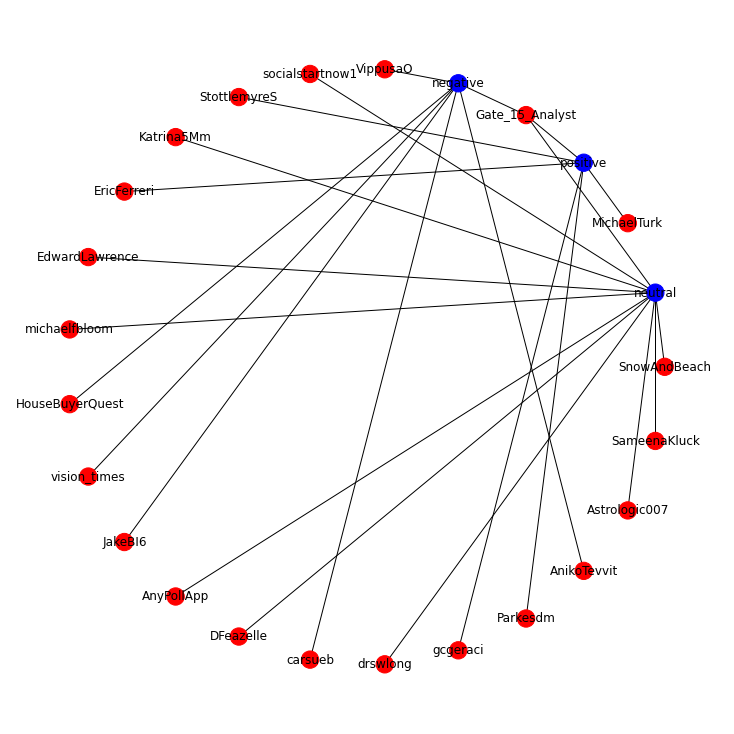

<Figure size 432x288 with 0 Axes>

In [30]:
plt.figure(figsize = (10, 10))
nx.draw_circular(g, with_labels = True, node_color=nc)
plt.show()
plt.savefig("../images/usa_greedy_color_graph.png")

## Directed Graps

In [31]:
# Create an undirected weighted graph using your Dataframe
g = nx.from_pandas_edgelist(df, source='twitter_name', target='sentiment', create_using=nx.DiGraph())

In [32]:
g.nodes()

NodeView(('SnowAndBeach', 'neutral', 'MichaelTurk', 'positive', 'Gate_15_Analyst', 'negative', 'VippusaO', 'socialstartnow1', 'StottlemyreS', 'Katrina5Mm', 'EricFerreri', 'EdwardLawrence', 'michaelfbloom', 'HouseBuyerQuest', 'vision_times', 'JakeBI6', 'AnyPollApp', 'DFeazelle', 'carsueb', 'drswlong', 'gcgeraci', 'Parkesdm', 'AnikoTevvit', 'Astrologic007', 'SameenaKluck'))

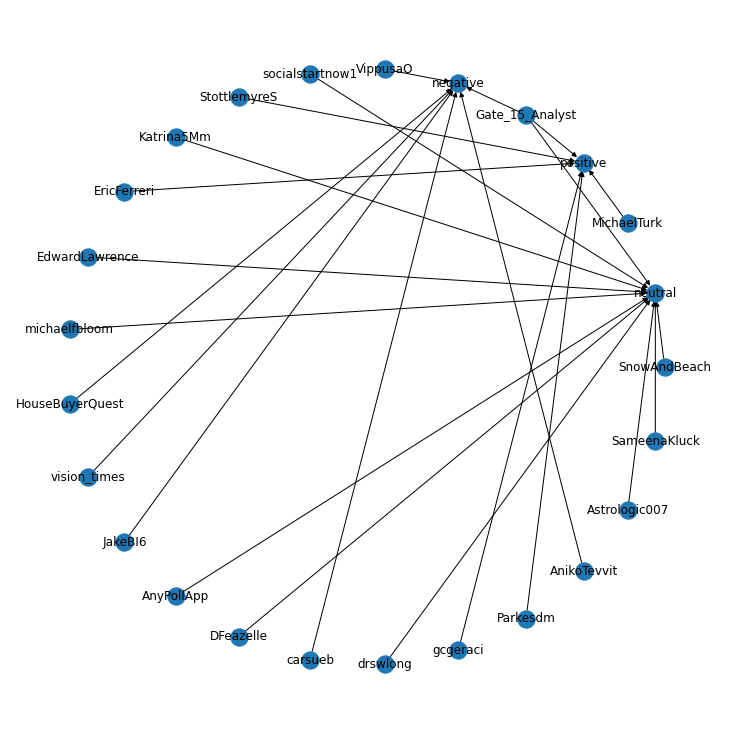

<Figure size 432x288 with 0 Axes>

In [33]:
plt.figure(figsize = (10, 10))
nx.draw_circular(g, with_labels = True)
plt.show()
plt.savefig('../images/usa_simple_directed_graph.png')

In [34]:
nx.shortest_path(g,'MichaelTurk','positive')

['MichaelTurk', 'positive']

In [35]:
nx.to_numpy_array(g)

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 